# Analyse Exploratoire

### Import des modules

In [109]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
import joblib
import missingno as msno


### Analyse Exploratoire

In [110]:

app_tr  = pd.read_csv("../data/application_train.csv")
app_te  = pd.read_csv("../data/application_test.csv")
bureau  = pd.read_csv("../data/bureau.csv")
bbal    = pd.read_csv("../data/bureau_balance.csv")
prev    = pd.read_csv("../data/previous_application.csv")
cc      = pd.read_csv("../data/credit_card_balance.csv")
pos     = pd.read_csv("../data/POS_CASH_balance.csv")
inst    = pd.read_csv("../data/installments_payments.csv")


In [111]:
app_tr.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [112]:
bureau_agg = (bureau.groupby("SK_ID_CURR")
              .agg(nb_loans=("SK_ID_BUREAU","count"),
                   sum_debt=("AMT_CREDIT_SUM_DEBT","sum"))
              .reset_index())

bureau_agg
  

,SK_ID_CURR,nb_loans,sum_debt
0,100001,7,596686.500
1,100002,8,245781.000
2,100003,4,0.000
3,100004,2,0.000
4,100005,3,568408.500
...,...,...,...
305806,456249,13,163071.000
305807,456250,3,2232040.095
305808,456253,4,1795833.000
305809,456254,1,0.000


### Jointure

In [113]:
# Jointure
df_train = app_tr.merge(bureau_agg, on="SK_ID_CURR", how="left")


In [114]:
missing = df_train.isna().sum()
total_missing = missing.sum() 

print(f"Nombre total de valeurs manquantes : {total_missing}")

Nombre total de valeurs manquantes : 9240505


In [115]:
# Colonnes non numériques
non_num_cols = df_train.select_dtypes(exclude=['number']).columns
print("Colonnes non numériques :")
print(non_num_cols.tolist())


Colonnes non numériques :
['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE']


In [116]:
df_train.info()
df_train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 124 entries, SK_ID_CURR to sum_debt
dtypes: float64(67), int64(41), object(16)
memory usage: 290.9+ MB


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,nb_loans,sum_debt
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0.0,0.0,0.0,0.0,0.0,1.0,8.0,245781.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [117]:
df_train["DAYS_BIRTH"]

0         -9461
1        -16765
2        -19046
3        -19005
4        -19932
          ...  
307506    -9327
307507   -20775
307508   -14966
307509   -11961
307510   -16856
Name: DAYS_BIRTH, Length: 307511, dtype: int64

In [118]:
# Transformation Days Birth en age 
df_train["AGE"] = -df_train["DAYS_BIRTH"] // 365
df_train["AGE"] 

0         25
1         45
2         52
3         52
4         54
          ..
307506    25
307507    56
307508    41
307509    32
307510    46
Name: AGE, Length: 307511, dtype: int64

# 📊 Les stats descriptives

### 📊 Distribution

/tmp/ipykernel_1497160/3654111026.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=class_counts.index.astype(str), y=class_counts.values, palette="viridis")


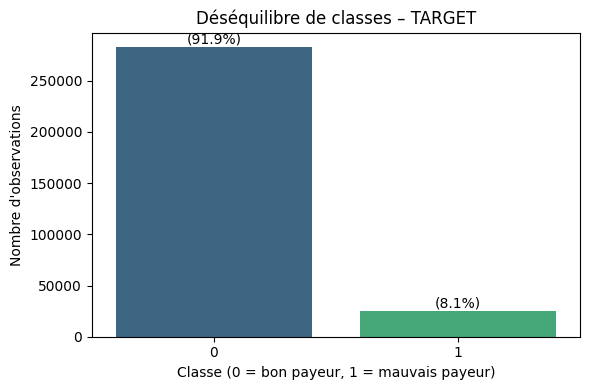

In [119]:
import matplotlib.pyplot as plt
import seaborn as sns

class_counts = df_train["TARGET"].value_counts().sort_index()

plt.figure(figsize=(6,4))
ax = sns.barplot(x=class_counts.index.astype(str), y=class_counts.values, palette="viridis")

total = class_counts.sum()
for i, v in enumerate(class_counts.values):
    ax.text(i, v + 800, f"({v/total*100:.1f}%)", ha="center", va="bottom")

plt.title("Déséquilibre de classes – TARGET")
plt.xlabel("Classe (0 = bon payeur, 1 = mauvais payeur)")
plt.ylabel("Nombre d'observations")
plt.tight_layout()
plt.show()


### Distribution du montant du crédit accordé (AMT_CREDIT)

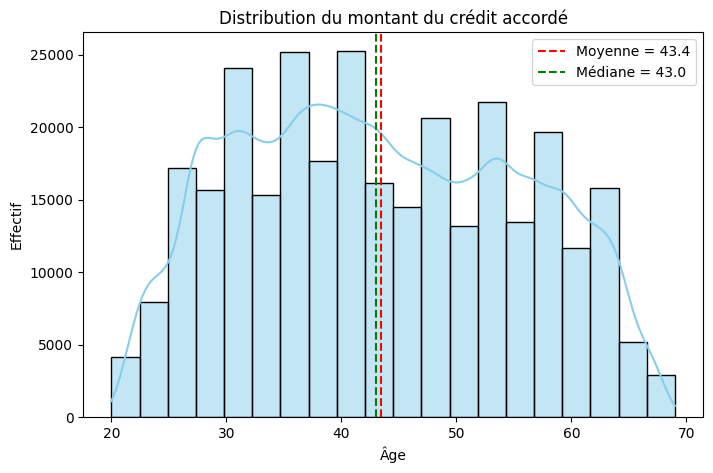

In [120]:
plt.figure(figsize=(8,5))
sns.histplot(df_train['AGE'], bins=20, kde=True, color="skyblue")
plt.axvline(df_train['AGE'].mean(), color='red', linestyle='--', label=f"Moyenne = {df_train['AGE'].mean():.1f}")
plt.axvline(df_train['AGE'].median(), color='green', linestyle='--', label=f"Médiane = {df_train['AGE'].median():.1f}")
plt.title("Distribution du montant du crédit accordé")
plt.xlabel("Âge")
plt.ylabel("Effectif")
plt.legend()
plt.show()

## Montant du crédit du prêt par age

/tmp/ipykernel_1497160/3679358756.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=credit_share.index, y=credit_share.values, palette="coolwarm")


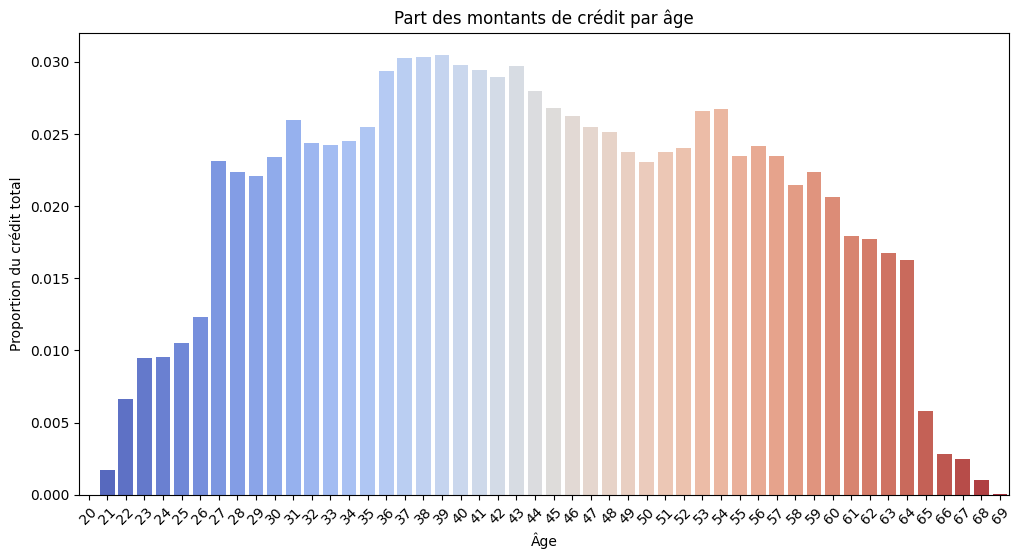

In [121]:
credit_par_age = df_train.groupby("AGE")["AMT_CREDIT"].sum()

credit_share = credit_par_age / credit_par_age.sum()

plt.figure(figsize=(12,6))
sns.barplot(x=credit_share.index, y=credit_share.values, palette="coolwarm")
plt.title("Part des montants de crédit par âge")
plt.ylabel("Proportion du crédit total")
plt.xlabel("Âge")
plt.xticks(rotation=45)
plt.show()

### Target en fonction de l'age

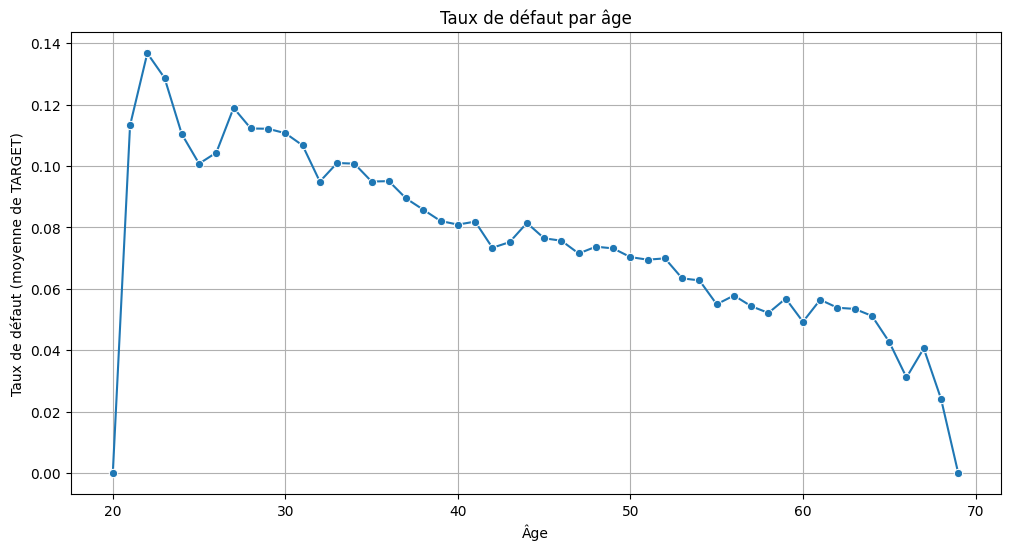

In [122]:
default_rate_by_age = df_train.groupby("AGE")["TARGET"].mean()

plt.figure(figsize=(12,6))
sns.lineplot(x=default_rate_by_age.index, y=default_rate_by_age.values, marker="o")
plt.title("Taux de défaut par âge")
plt.xlabel("Âge")
plt.ylabel("Taux de défaut (moyenne de TARGET)")
plt.grid(True)
plt.show()

/tmp/ipykernel_1497160/176934494.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=default_rate_by_org.index, y=default_rate_by_org.values, palette="viridis")


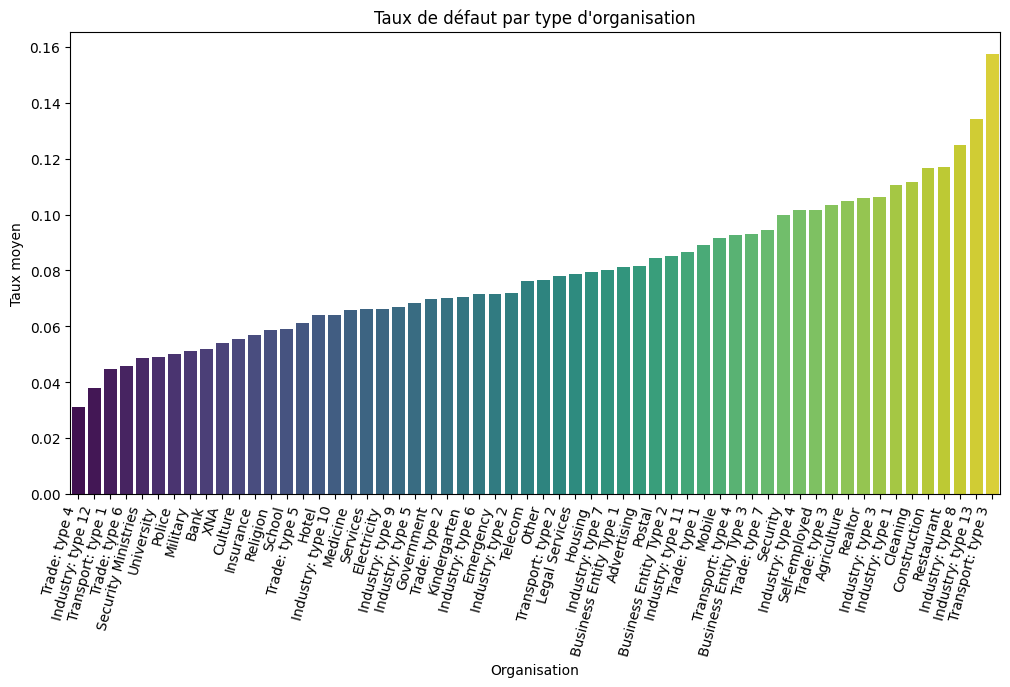

In [123]:
default_rate_by_org = df_train.groupby("ORGANIZATION_TYPE")["TARGET"].mean().sort_values()

plt.figure(figsize=(12,6))
sns.barplot(x=default_rate_by_org.index, y=default_rate_by_org.values, palette="viridis")
plt.xticks(rotation=75, ha="right")
plt.title("Taux de défaut par type d'organisation")
plt.xlabel("Organisation")
plt.ylabel("Taux moyen")
plt.show()


/tmp/ipykernel_1497160/558571256.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=default_rate_income_type.index, y=default_rate_income_type.values, palette="viridis")


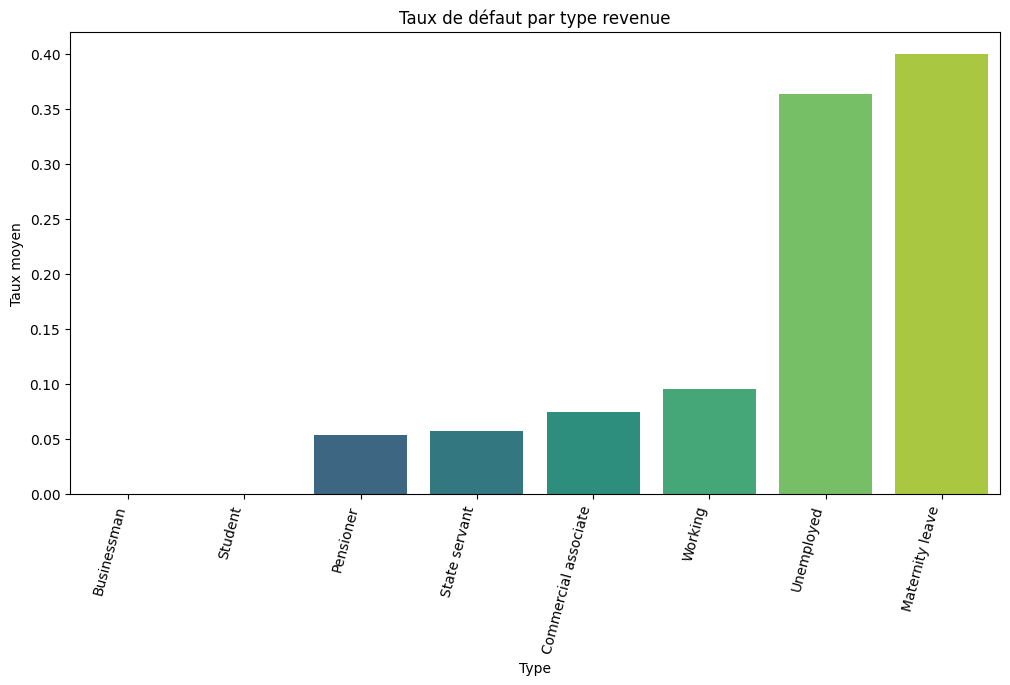

In [124]:
default_rate_income_type = df_train.groupby("NAME_INCOME_TYPE")["TARGET"].mean().sort_values()

plt.figure(figsize=(12,6))
sns.barplot(x=default_rate_income_type.index, y=default_rate_income_type.values, palette="viridis")
plt.xticks(rotation=75, ha="right")
plt.title("Taux de défaut par type revenue")
plt.xlabel("Type")
plt.ylabel("Taux moyen")
plt.show()


/tmp/ipykernel_1497160/1108658944.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  default_rate_children = df_train.groupby("CNT_CHILDREN_BIN")["TARGET"].mean()
/tmp/ipykernel_1497160/1108658944.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=default_rate_children.index, y=default_rate_children.values, palette="viridis")


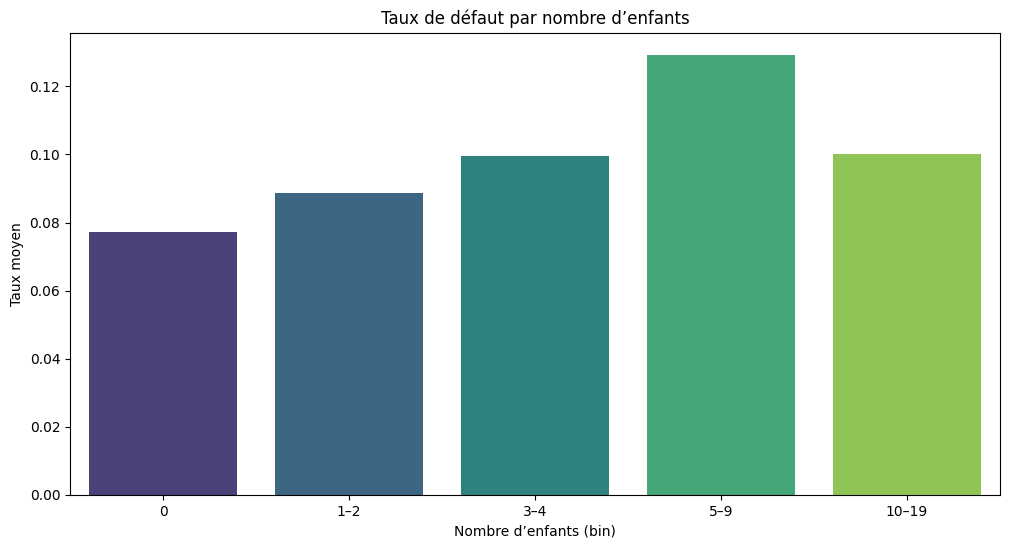

In [125]:
bins = [-1, 0, 2, 4, 9, 19] 
labels = ["0", "1–2", "3–4", "5–9", "10–19"]

df_train["CNT_CHILDREN_BIN"] = pd.cut(
    df_train["CNT_CHILDREN"], bins=bins, labels=labels, ordered=True
)

default_rate_children = df_train.groupby("CNT_CHILDREN_BIN")["TARGET"].mean()

plt.figure(figsize=(12,6))
sns.barplot(x=default_rate_children.index, y=default_rate_children.values, palette="viridis")
plt.title("Taux de défaut par nombre d’enfants")
plt.xlabel("Nombre d’enfants (bin)")
plt.ylabel("Taux moyen")
plt.show()

In [126]:
joblib.dump(df_train, "df.joblib")

['df.joblib']